# Dataset Restaurante: Análise Exploratória dos Dados

## Introdução : 
O conjunto de dados em questão oferece uma visão abrangente do cenário de restaurantes, fornecendo informações detalhadas sobre uma variedade de estabelecimentos gastronômicos em diferentes localidades ao redor do mundo. Composto por uma série de variáveis, esses dados capturam uma ampla gama de aspectos relacionados aos restaurantes, desde suas localizações geográficas até os serviços oferecidos, passando pelos tipos de culinária disponíveis e as avaliações dos clientes.

## Perguntas a serem respondidas:
1. Quais cidades tem maiores concentrações de restaurantes?
2. Quais são as cozinhas mais comuns entre os  restaurantes?
3. Qual a distribuição do número total de avaliações?
4. Qual a distribuição da classificção média dos restaurantes, com base na avaliação dos cliente?
5. Qual a porcentagem dos restaurantes que tem a reserva de mesa e os que não tem reserva de mesa?
6. Existe uma correlação entre o preço médio para duas pessoas e a classificação média dos restaurantes?
7. Qual a culinária mais comum nas cidades?
8. Existem valores discrepantes nas avalições dos restaurantes com reserva de mesa?
9. Quais são os restaurantes com as melhores avaliaçõe?
10. Quais são as avaliações médias dos restaurantes que tem disponibilidade de entrega online?
11. Qual é a relação entre a classificação média, a quantidade de votos e a disponibilidade de entrega online nos restaurantes?
12. Quais são os 10 restaurantes mais populares, com base na quantidade de votos que receberam?
13. Quais são as 10 cozinhas mais bem avaliadas pelos clientes?

## Carregamento das  bibliotecas:

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Carregamento dos dados:

In [112]:
dados = pd.read_csv('C:/Users/Moura/Downloads/Dataset .csv')

## Limpeza e tratamento dos dados:

In [113]:
dados.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [114]:
#verificando valores nulos
print(dados.isna().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [115]:
#retirando valores nulos
dados = df.dropna()

In [116]:
#verificando dados duplicados
dados.duplicated().sum()

43

In [117]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant Name       9542 non-null   object 
 1   City                  9542 non-null   object 
 2   Cuisines              9542 non-null   object 
 3   Average Cost for two  9542 non-null   int64  
 4   Has Table booking     9542 non-null   object 
 5   Has Online delivery   9542 non-null   object 
 6   Is delivering now     9542 non-null   object 
 7   Switch to order menu  9542 non-null   object 
 8   Aggregate rating      9542 non-null   float64
 9   Rating text           9542 non-null   object 
 10  Votes                 9542 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


In [118]:
print(dados.columns)

Index(['Restaurant Name', 'City', 'Cuisines', 'Average Cost for two',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Switch to order menu', 'Aggregate rating', 'Rating text', 'Votes'],
      dtype='object')


In [119]:
# Deixando apenas as colunas que  eu vou utilizar
df = dados[['Restaurant Name', 'City', 'Cuisines', 'Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Aggregate rating',  'Rating text', 'Votes']]

In [120]:
df.head()

,Restaurant Name,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating text,Votes
0,Le Petit Souffle,Makati City,"French, Japanese, Desserts",1100,Yes,No,No,No,4.8,Excellent,314
1,Izakaya Kikufuji,Makati City,Japanese,1200,Yes,No,No,No,4.5,Excellent,591
2,Heat - Edsa Shangri-La,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Yes,No,No,No,4.4,Very Good,270
3,Ooma,Mandaluyong City,"Japanese, Sushi",1500,No,No,No,No,4.9,Excellent,365
4,Sambo Kojin,Mandaluyong City,"Japanese, Korean",1500,Yes,No,No,No,4.8,Excellent,229


In [121]:
df.describe()

,Average Cost for two,Aggregate rating,Votes
count,9542.000000,9542.000000,9542.000000
mean,1200.326137,2.665238,156.772060
std,16128.743876,1.516588,430.203324
min,0.000000,0.000000,0.000000
25%,250.000000,2.500000,5.000000
50%,400.000000,3.200000,31.000000
75%,700.000000,3.700000,130.000000
max,800000.000000,4.900000,10934.000000


## Análise Univariada

<b> <i>1. Quais cidades tem maiores concentrações de restaurantes?</i> <b>

In [122]:
contagem_por_cidade = df['City'].value_counts()

print(contagem_por_cidade.head(10))

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64


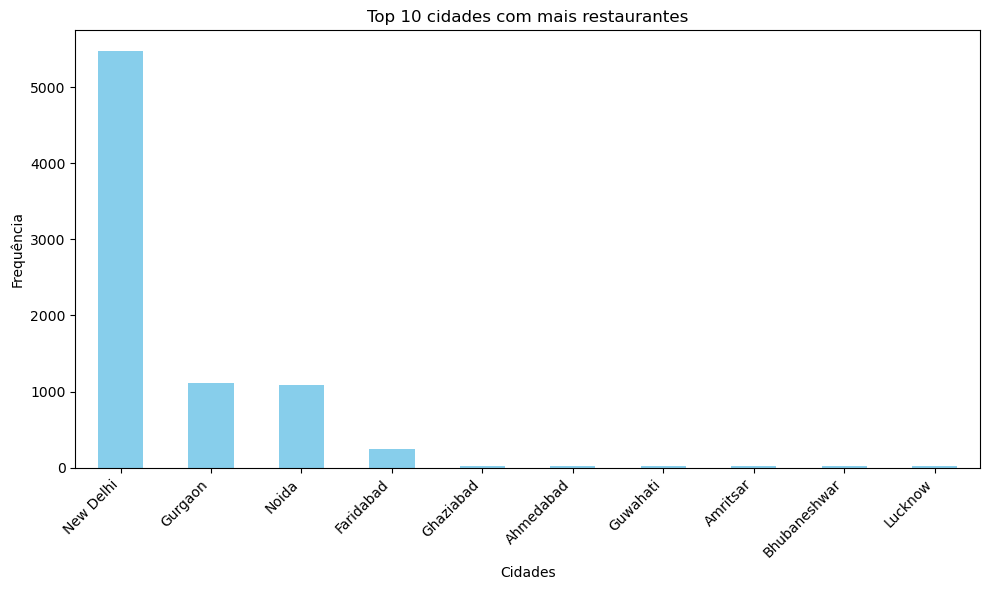

In [123]:

top_cuisines = df['City'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_cuisines.plot(kind='bar', color='skyblue')
plt.title('Top 10 cidades com mais restaurantes')
plt.xlabel('Cidades')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


<b> <i>2. Quais são as cozinhas mais comuns entre os  restaurantes?</i> <b>

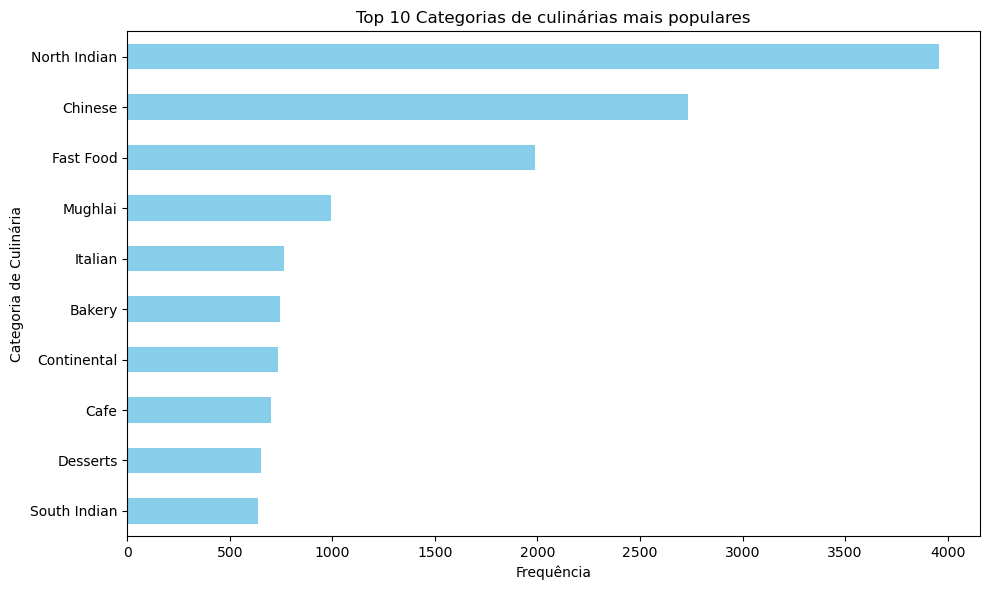

In [124]:
categorias_cozinha = df['Cuisines'].str.split(', ')

todas_categorias = []
for lista in categorias_cozinha:
    todas_categorias.extend(lista)

contagem_categorias = pd.Series(todas_categorias).value_counts()


top_10_categorias = contagem_categorias.head(10)


top_10_categorias = top_10_categorias.sort_values(ascending=True)


plt.figure(figsize=(10, 6))
top_10_categorias.plot(kind='barh', color='skyblue')
plt.title('Top 10 Categorias de culinárias mais populares')
plt.xlabel('Frequência')
plt.ylabel('Categoria de Culinária')
plt.tight_layout() 
plt.show()

<b> <i>3. Qual a distribuição do número total de avaliações?</i> <b>

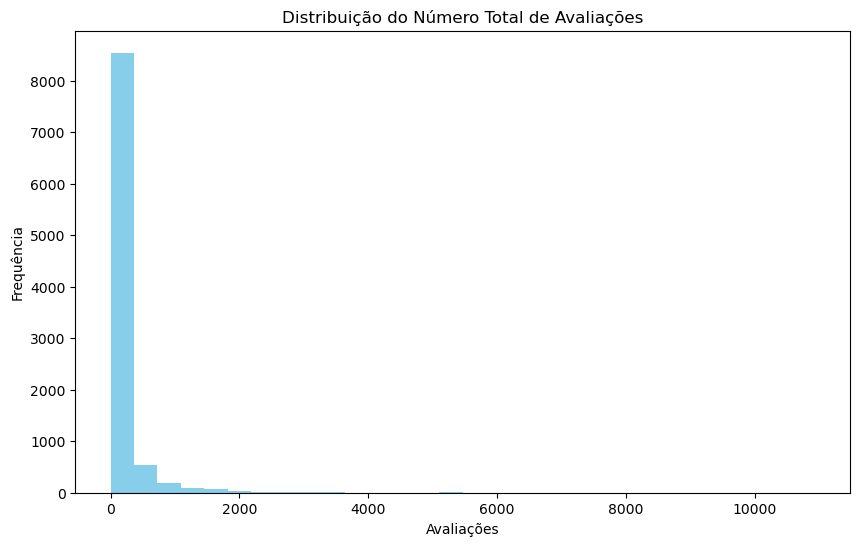

In [125]:
plt.figure(figsize=(10, 6))
plt.hist(df['Votes'], bins=30, color='skyblue')
plt.title('Distribuição do Número Total de Avaliações')
plt.xlabel('Avaliações')
plt.ylabel('Frequência')

plt.show()

<b> <i>4. Como é a distribuição da classificção média dos restaurantes, com base nas avaliações dos clientes?</i> <b>

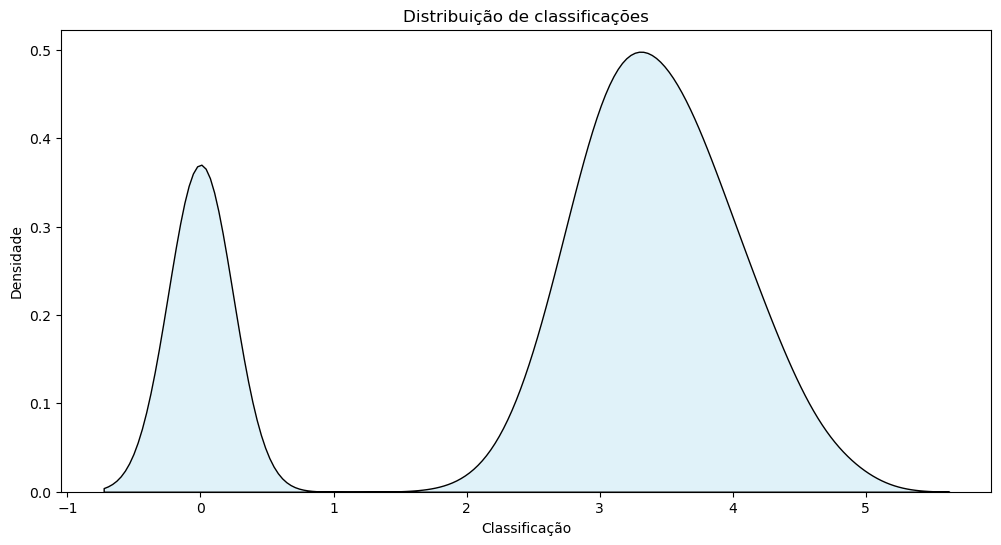

In [126]:
 
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Aggregate rating'], fill=True, color='skyblue', edgecolor='black')
plt.title('Distribuição de classificações')
plt.xlabel('Classificação')
plt.ylabel('Densidade')
plt.show()

<b> <i>5. Qual a porcentagem dos restaurantes que tem a reserva de mesa e os que não tem reserva de mesa?</i> <b>

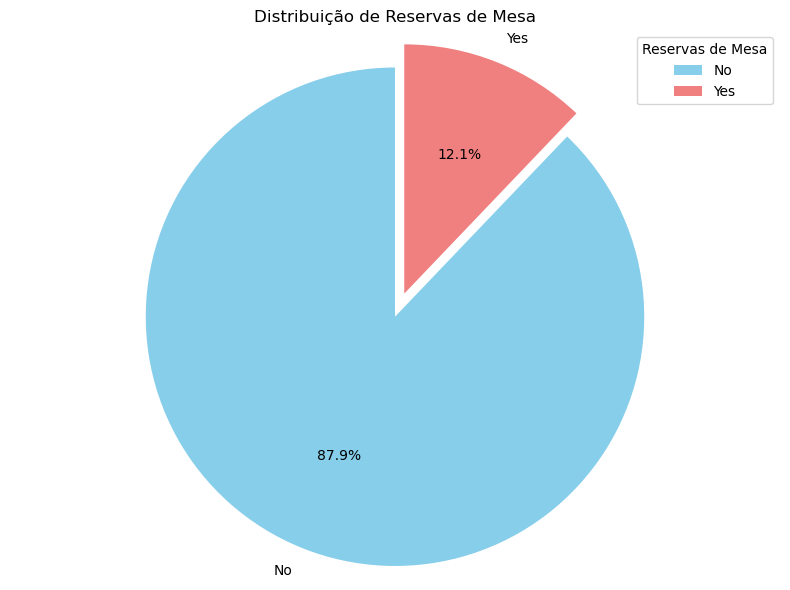

In [127]:
counts = df['Has Table booking'].value_counts()

colors = ['skyblue', 'lightcoral']

explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90)
plt.title('Distribuição de Reservas de Mesa')
plt.axis('equal')

plt.legend(title='Reservas de Mesa', loc='upper right')

plt.tight_layout()

plt.show()

## Análise Bivariada e Multivariada

<b> <i>6. Existe uma correlação entre o preço médio para duas pessoas e a classificação média dos restaurantes?</i> <b>

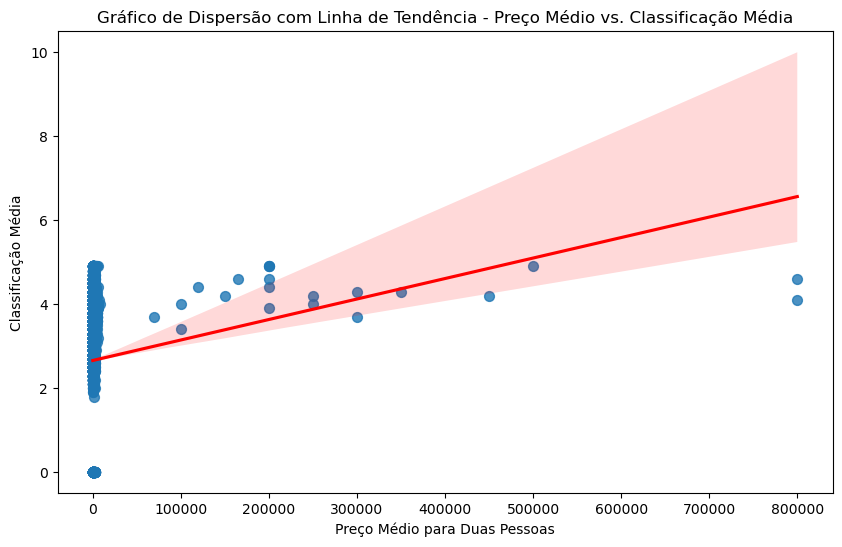

In [128]:

plt.figure(figsize=(10, 6))
sns.regplot(x='Average Cost for two', y='Aggregate rating', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})


plt.xlabel('Preço Médio para Duas Pessoas')
plt.ylabel('Classificação Média')
plt.title('Gráfico de Dispersão com Linha de Tendência - Preço Médio vs. Classificação Média')



plt.show()

A inclinação da linha indica que há uma relação positiva entre o preço médio e a classificação média. Isso sugere que, conforme o preço médio aumenta, a classificação média também tende a aumentar. Entretanto, não é possível falar de causalidade, isto é, que uma variável seja a causa da outra.

<b> <i>7. Qual a culinária mais comum por cidades?</i> <b>

In [129]:

mostcommon_cuisine_per_city = df.groupby(['City'])['Cuisines'].apply(lambda x: x.str.split(', ').explode().value_counts().idxmax()).reset_index(name='mostcommon_cuisine')

print("Most common cuisine per city:")
print(mostcommon_cuisine_per_city)

Most common cuisine per city:
                City mostcommon_cuisine
0          Abu Dhabi             Indian
1               Agra       North Indian
2          Ahmedabad        Continental
3             Albany           American
4          Allahabad       North Indian
..               ...                ...
135          Weirton             Burger
136  Wellington City               Cafe
137   Winchester Bay             Burger
138          Yorkton              Asian
139        ��stanbul           Desserts

[140 rows x 2 columns]


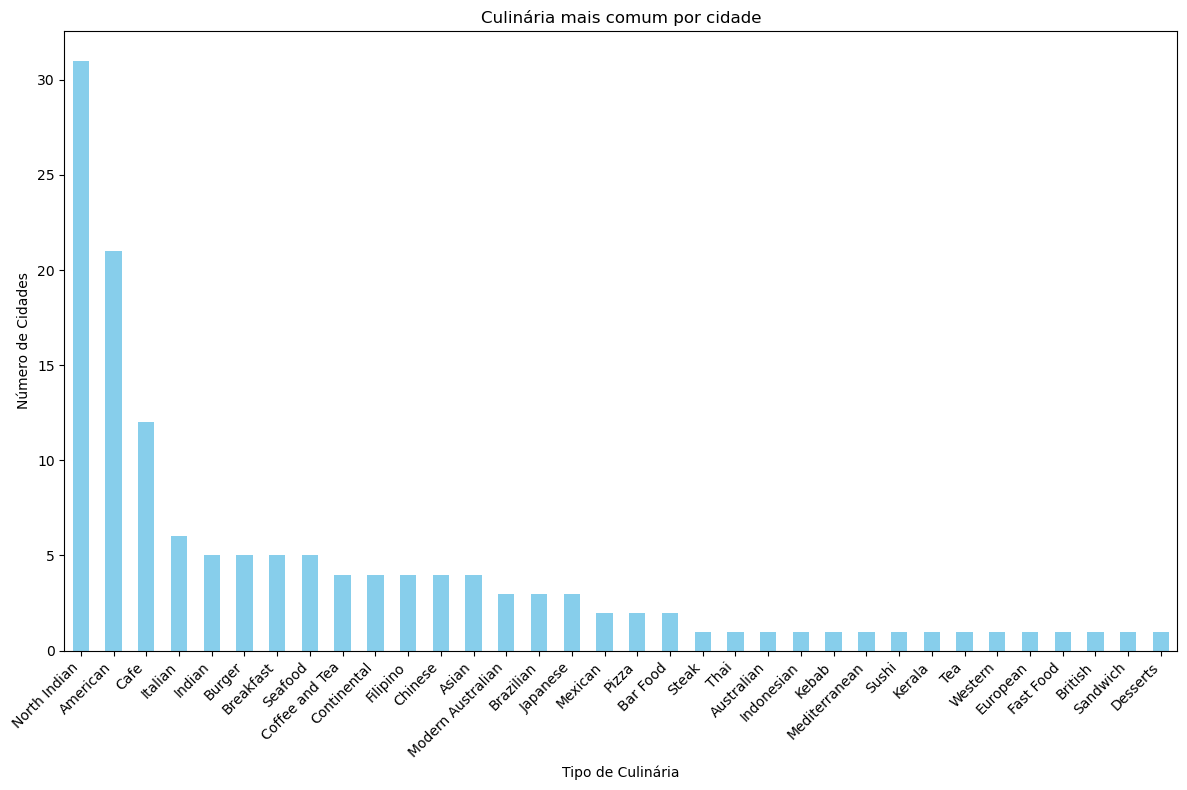

In [130]:

plt.figure(figsize=(12, 8))
mostcommon_cuisine_per_city['mostcommon_cuisine'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Culinária mais comum por cidade')
plt.xlabel('Tipo de Culinária')
plt.ylabel('Número de Cidades')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

<b> <i>8. Existem valores discrepantes nas avalições dos restaurantes com reserva de mesa?</i> <b>

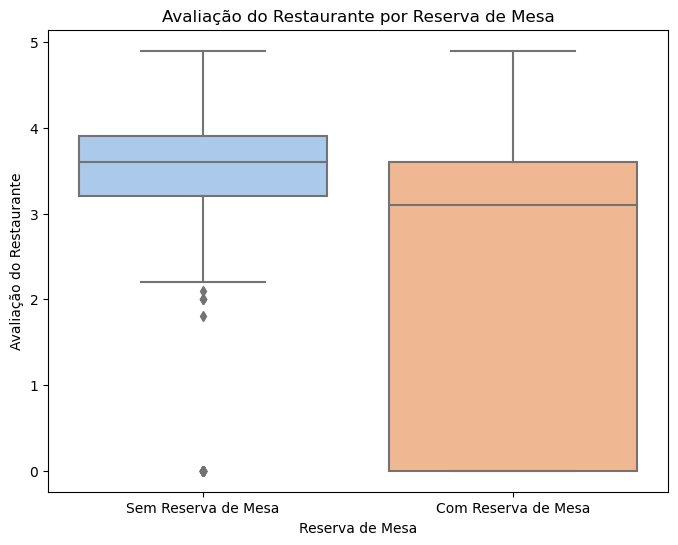

In [131]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Has Table booking', y='Aggregate rating', data=df, palette='pastel')
plt.title('Avaliação do Restaurante por Reserva de Mesa')
plt.xlabel('Reserva de Mesa')
plt.ylabel('Avaliação do Restaurante')
plt.xticks([0, 1], ['Sem Reserva de Mesa', 'Com Reserva de Mesa'])
plt.show()

<b> <i>9. Quais são os restaurantes com as melhores avaliações?</i> <b>

In [132]:
# Filtrar os restaurantes com a nota 4.9
restaurantes_49 = df.loc[df['Aggregate rating'] == 4.9]

print("Restaurantes com a nota 4.9:")
print(restaurantes_49[['Restaurant Name', 'Aggregate rating']])

Restaurantes com a nota 4.9:
                               Restaurant Name  Aggregate rating
3                                         Ooma               4.9
8     Spiral - Sofitel Philippine Plaza Manila               4.9
10                            Silantro Fil-Mex               4.9
39                                  Coco Bambu               4.9
48                          Braseiro da G��vea               4.9
...                                        ...               ...
9484            Restaurant Mosaic @ The Orient               4.9
9514                          Ministry of Crab               4.9
9524                              Gaga Manjero               4.9
9538                                 Starbucks               4.9
9540                          Draft Gastro Pub               4.9

[61 rows x 2 columns]


<b> <i>10. Quais são as avaliações médias dos restaurantes que tem disponibilidade de entrega online?</i> <b>

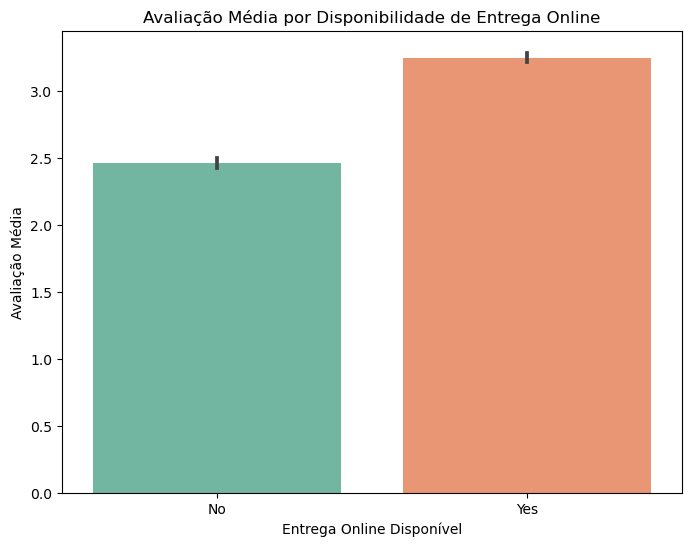

In [133]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Has Online delivery', y='Aggregate rating', data=df, palette='Set2')
plt.title('Avaliação Média por Disponibilidade de Entrega Online')
plt.xlabel('Entrega Online Disponível')
plt.ylabel('Avaliação Média')
plt.show()

percebe-se que os restaurantes com entregas disponivéis, tem as melhores avaliações.  

<b> <i>11. Qual é a relação entre a classificação média, a quantidade de votos e a disponibilidade de entrega online nos restaurantes?</i> <b>

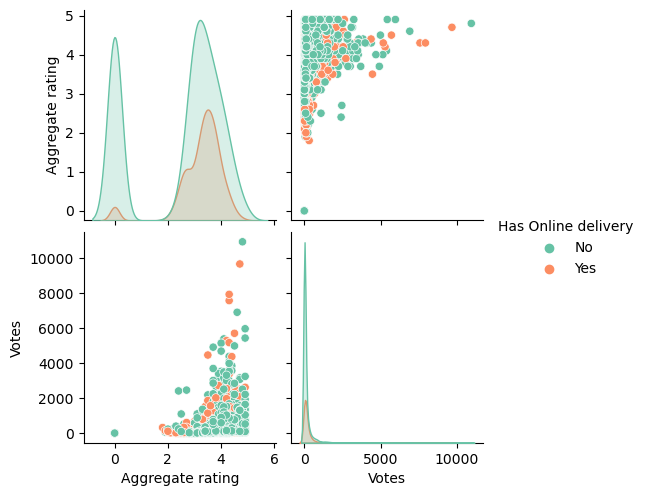

In [134]:
data = df[['Aggregate rating', 'Has Online delivery', 'Votes']]

# Criar a matriz de dispersão
sns.pairplot(data, hue='Has Online delivery', palette='Set2')
plt.show()

<b> <i>12. Quais são os 10 restaurantes mais populares, com base na quantidade de votos que receberam?</i> <b>

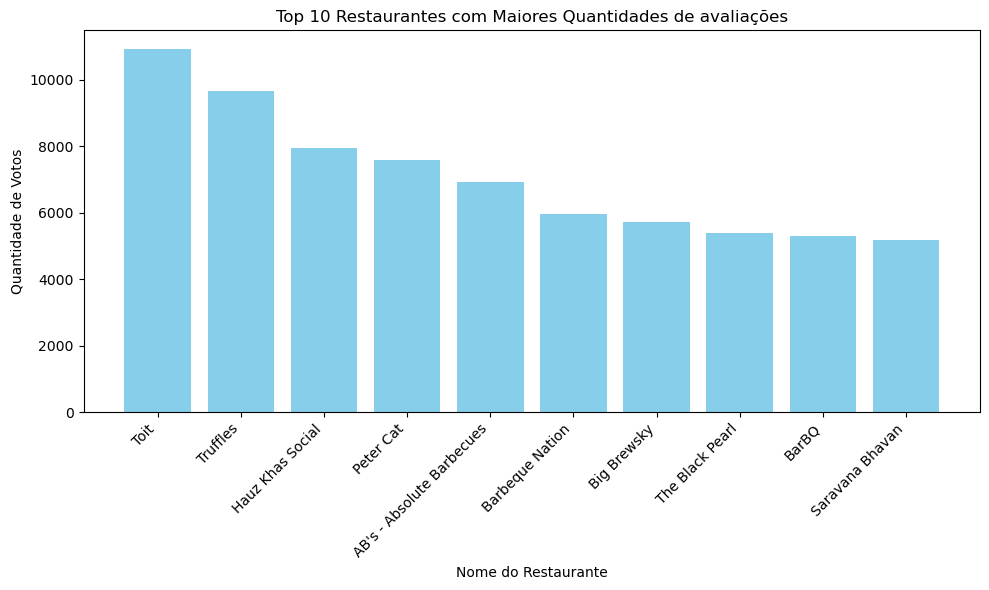

In [135]:
top_10_restaurantes = df.nlargest(11, 'Votes')

plt.figure(figsize=(10, 6))
plt.bar(top_10_restaurantes['Restaurant Name'], top_10_restaurantes['Votes'], color='skyblue')
plt.title('Top 10 Restaurantes com Maiores Quantidades de avaliações')
plt.xlabel('Nome do Restaurante')
plt.ylabel('Quantidade de Votos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<b> <i>13. Quais são as 10 cozinhas mais bem avaliadas pelos clientes?</i> <b>

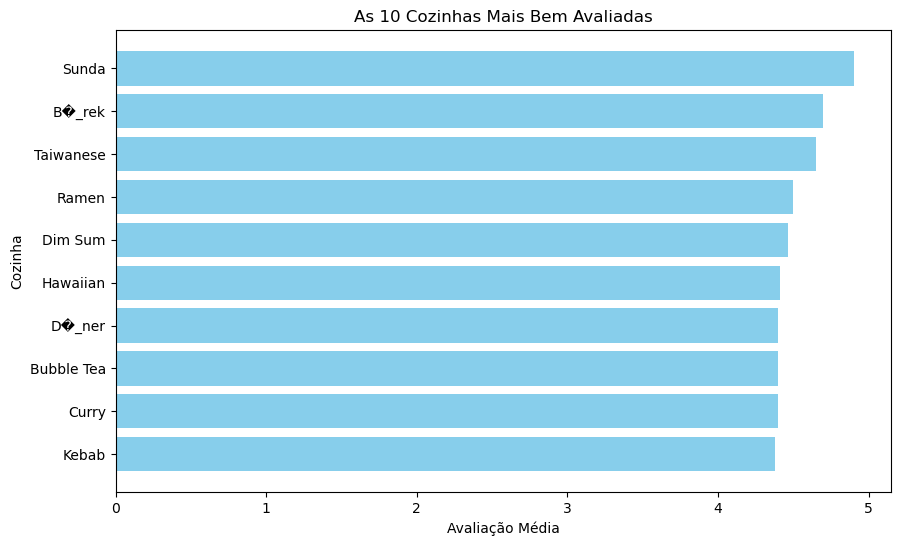

In [136]:


cuisines = df['Cuisines'].str.split(', ', expand=True)

cuisines_long = cuisines.stack().reset_index(level=1, drop=True).rename('Cuisine')

df_long = df.drop('Cuisines', axis=1).join(cuisines_long)

avg_rating_per_cuisine = df_long.groupby('Cuisine')['Aggregate rating'].mean().reset_index()

avg_rating_per_cuisine = avg_rating_per_cuisine.sort_values(by='Aggregate rating', ascending=False)

plt.figure(figsize=(10, 6))
top_cuisines = avg_rating_per_cuisine.head(10)
plt.barh(top_cuisines['Cuisine'], top_cuisines['Aggregate rating'], color='skyblue')
plt.xlabel('Avaliação Média')
plt.ylabel('Cozinha')
plt.title('As 10 Cozinhas Mais Bem Avaliadas')
plt.gca().invert_yaxis()  
plt.show()

## Conclusão:

Essa análise oferece uma visão abrangente e detalhada do cenário gastronômico presente nos dados fornecidos. Foi possível  proporcionar insights importantes que podem influenciar decisões estratégicas e  operacionais no setor de restaurantes. 
A importância dessa análise reside na capacidade de fornecer informações acionáveis que podem orientar  proprietários de restaurantes em escolhas de estrátegias de markerting, em melhorias nos serviços oferecidos e até mesmo ajustes nos preços. Por exemplo, a percepção sobre relação entre a disponibilidade de entrega online e a classificação média dos restaurantes pode influenciar a decisão de implementar ou não esse serviço. 